<a href="https://colab.research.google.com/github/Hienquang/SpringBoard/blob/main/Video_games_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Are video games getting worse?

Data contains over 13,000 games which includes games ranging from 1977 to the middle of 2020. Most of the data came from directly from the VGChartz database but some has been manually entered in from other sources. For example a lot of the critic and user scores were entered from information available on Metacritic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('game_sales_data.csv', engine='python')

In [3]:
df.head()

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19600 entries, 0 to 19599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           19600 non-null  int64  
 1   Name           19600 non-null  object 
 2   Platform       19600 non-null  object 
 3   Publisher      19600 non-null  object 
 4   Developer      19598 non-null  object 
 5   Critic_Score   9969 non-null   float64
 6   User_Score     2223 non-null   float64
 7   Total_Shipped  19600 non-null  float64
 8   Year           19600 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.3+ MB


In [5]:
#fill in missing info for score using median method
df.Critic_Score = df.Critic_Score.fillna(df.Critic_Score.median())
df.User_Score = df.User_Score.fillna(df.User_Score.median())

In [6]:
df[df.Developer.isnull()]

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
10540,10539,Gourmet Chef: Cook Your Way to Fame,DS,Ubisoft,NaN,7.0,7.2,0.14,2008
12501,12500,Wordmaster,DS,"Destination Software, Inc",NaN,5.8,7.2,0.09,2008


In [7]:
#with help from Google, I can fill in missing info for Developer as well
df.loc[[10540], ['Developer']] = 'Ubisoft'
df.loc[[12501], ['Developer']] = 'Sarbakan'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19600 entries, 0 to 19599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           19600 non-null  int64  
 1   Name           19600 non-null  object 
 2   Platform       19600 non-null  object 
 3   Publisher      19600 non-null  object 
 4   Developer      19600 non-null  object 
 5   Critic_Score   19600 non-null  float64
 6   User_Score     19600 non-null  float64
 7   Total_Shipped  19600 non-null  float64
 8   Year           19600 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.3+ MB


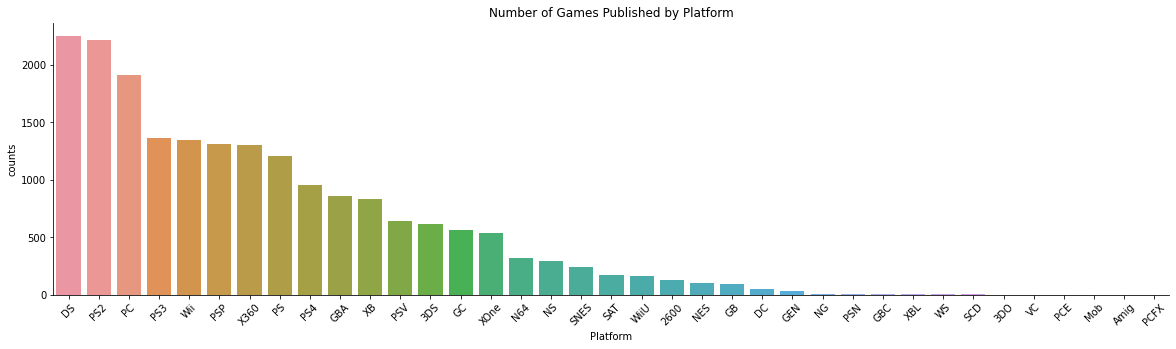

In [9]:
#group data by platform
platform = df.groupby('Platform').size().reset_index(name='counts')

#plot games by platform
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Platform',y='counts', data=platform, ax= ax,
            order=platform.sort_values('counts',ascending = False).Platform)

#plot formating
sns.despine(bottom = False, left = False)
plt.xticks(rotation=45)
plt.title("Number of Games Published by Platform")

plt.show()

There are more games published on older platforms because they exist for longer

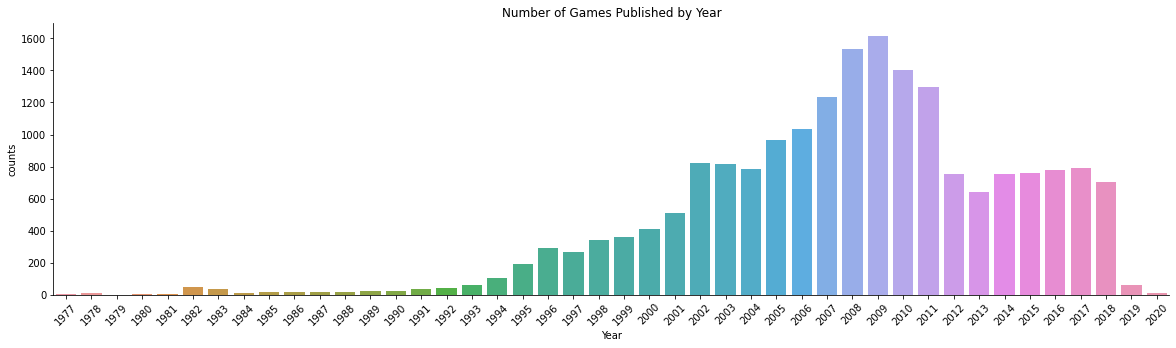

In [10]:
#group data by year
year = df.groupby('Year').size().reset_index(name='counts')

#plot games by year
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Year',y='counts', data=year, ax= ax,
            order=year.Year)

#plot formating
sns.despine(bottom = False, left = False)
plt.xticks(rotation=45)
plt.title("Number of Games Published by Year")

plt.show()

Number of games are published as time goes by, peaking in year 2009. There is a slight declined in year 2010 and 2011 folled by a sharp declined from year 2012 onwards

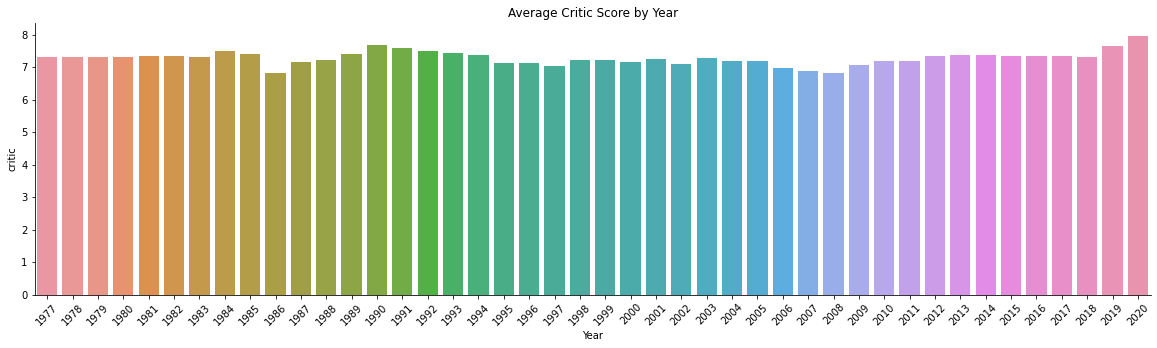

In [11]:
#group data by year
critic = df.groupby('Year')['Critic_Score'].mean().reset_index(name='critic')

#plot games by year
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Year',y='critic', data=critic, ax= ax,
            order=critic.Year)

#plot formating
sns.despine(bottom = False, left = False)
plt.xticks(rotation=45)
plt.title("Average Critic Score by Year")

plt.show()

Critic Scores haven't changed much over the years which doesn't support the idea the games has been getting worse.

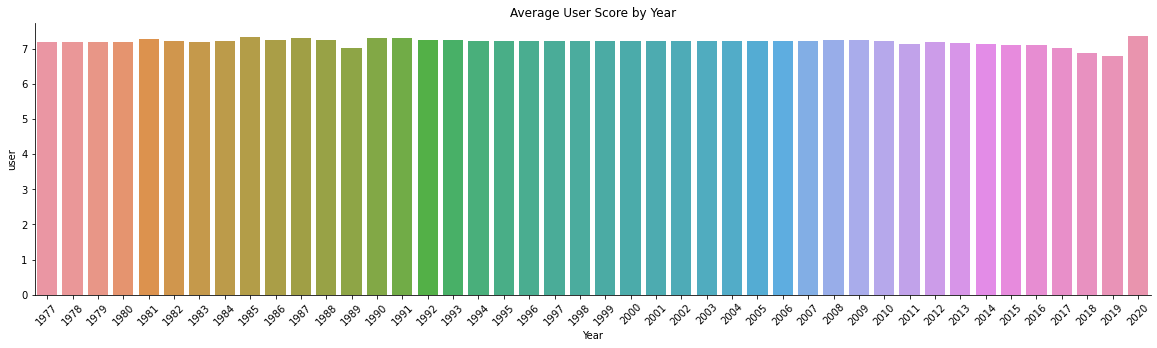

In [12]:
#group data by year
user = df.groupby('Year')['User_Score'].mean().reset_index(name='user')

#plot games by year
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Year',y='user', data=user, ax= ax,
            order=user.Year)

#plot formating
sns.despine(bottom = False, left = False)
plt.xticks(rotation=45)
plt.title("Average User Score by Year")

plt.show()

User scores haven't changed much either. 

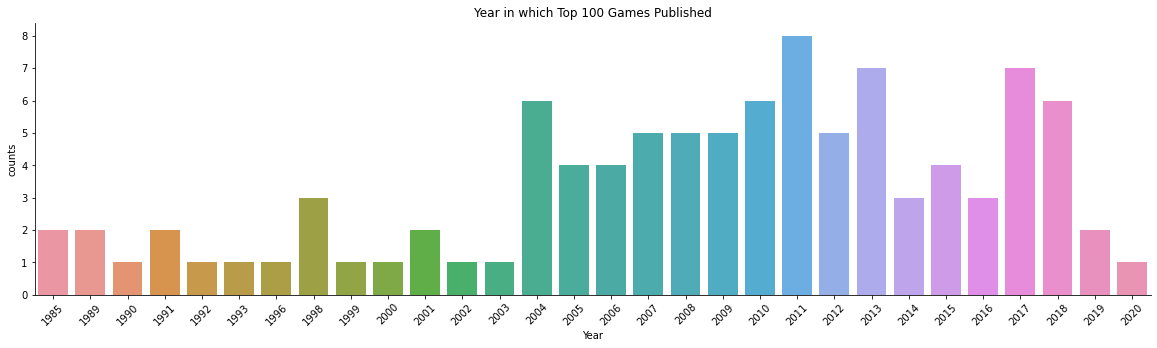

In [13]:
#Let's look at the score of the top 100 games only
df_top100 = df.sort_values('Rank').head(100)

#which year contribute to the top 100 games the most
year_100 = df_top100.groupby('Year').size().reset_index(name='counts')

#plot games by year
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Year',y='counts', data=year_100, ax= ax,
            order=year_100.Year)

#plot formating
sns.despine(bottom = False, left = False)
plt.xticks(rotation=45)
plt.title("Year in which Top 100 Games Published")

plt.show()

Interesting. There is some slight decrease in contribution to the top 100 games in recent years eventhough the average score  stayed consistent

In [14]:
cut_labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
cut_bins = [0, 2, 4, 6, 8, 10]
df['Critic_Bucket'] = pd.cut(df['Critic_Score'], bins=cut_bins, labels=cut_labels)
df['User_Bucket'] = pd.cut(df['User_Score'], bins=cut_bins, labels=cut_labels)

In [15]:
critic_bucket = df.groupby(['Critic_Bucket','Year']).size().reset_index(name='counts')

critic_sum = critic_bucket.groupby(by='Year')['counts'].sum().reset_index(name='SUM')
critic_sum = dict(zip(critic_sum.Year,critic_sum.SUM))

critic_bucket['SUM'] = critic_bucket['Year'].map(critic_sum).astype('int')
critic_bucket['percentage'] = np.true_divide(critic_bucket.counts,critic_bucket.SUM)*100

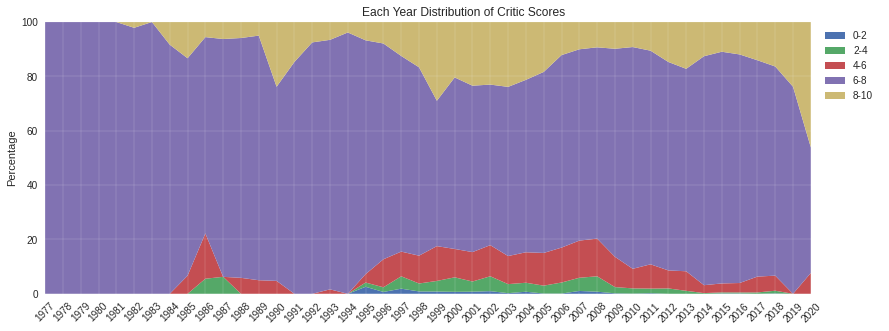

In [16]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(15,5))

plt.stackplot(critic_bucket.Year.unique(),
              critic_bucket[critic_bucket.Critic_Bucket=='0-2'].percentage,
              critic_bucket[critic_bucket.Critic_Bucket=='2-4'].percentage,
              critic_bucket[critic_bucket.Critic_Bucket=='4-6'].percentage,
              critic_bucket[critic_bucket.Critic_Bucket=='6-8'].percentage,
              critic_bucket[critic_bucket.Critic_Bucket=='8-10'].percentage,
              labels=['0-2','2-4','4-6','6-8','8-10'],
              zorder=0)
plt.title("Each Year Distribution of Critic Scores")
plt.legend(loc='upper right')
ax.set_xticks(critic_bucket.Year.unique())
plt.xticks(rotation=45)
plt.axis(True)

ax.set_xlim(1977, 2024)
ax.set_ylim(0, 100)

ax.grid(zorder=-1, alpha =0.5, linewidth=0.3)
ax.set_facecolor('white')
plt.ylabel('Percentage')

plt.show()

This graph seems to contradict the notion that games are getting worse. In fact, there are less and less games with low critic score

In [17]:
user_bucket = df.groupby(['User_Bucket','Year']).size().reset_index(name='counts')

user_sum = user_bucket.groupby(by='Year')['counts'].sum().reset_index(name='SUM')
user_sum = dict(zip(user_sum.Year,user_sum.SUM))

user_bucket['SUM'] = user_bucket['Year'].map(user_sum).astype('int')
user_bucket['percentage'] = np.true_divide(user_bucket.counts,user_bucket.SUM)*100

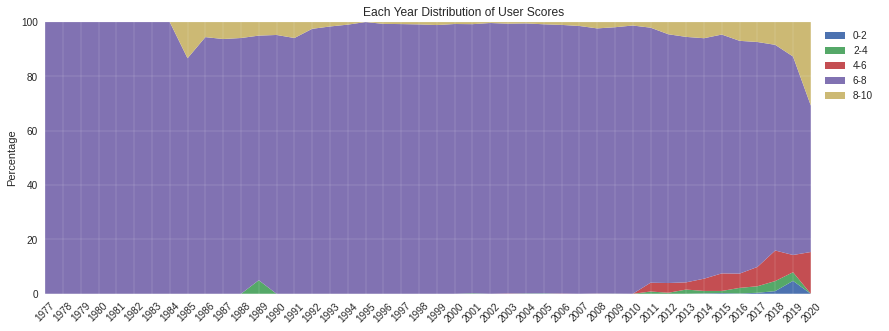

In [18]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(15,5))

plt.stackplot(user_bucket.Year.unique(),
              user_bucket[user_bucket.User_Bucket=='0-2'].percentage,
              user_bucket[user_bucket.User_Bucket=='2-4'].percentage,
              user_bucket[user_bucket.User_Bucket=='4-6'].percentage,
              user_bucket[user_bucket.User_Bucket=='6-8'].percentage,
              user_bucket[user_bucket.User_Bucket=='8-10'].percentage,
              labels=['0-2','2-4','4-6','6-8','8-10'],
              zorder=0)
plt.title("Each Year Distribution of User Scores")
plt.legend(loc='upper right')
ax.set_xticks(user_bucket.Year.unique())
plt.xticks(rotation=45)
plt.axis(True)

ax.set_xlim(1977, 2024)
ax.set_ylim(0, 100)

ax.grid(zorder=-1, alpha =0.5, linewidth=0.3)
ax.set_facecolor('white')
plt.ylabel('Percentage')

plt.show()

Interesting. It seems like in recently year, there is a divergent between critic score and user score, especially for games that lowly rated. On average, users rated games worst than critics. This is consistent with players's perception that new games are getting worse.

# Bonus

In [19]:
#Using Google to create a dictionary contain the year each platform was released
platform_dict = {'Wii':2006, 'NES':1983, 'PC':1977, 'GB':1989, 'DS':2004,
         'PS4':2013, 'NS':2017, 'X360':2005, 'SNES':1990, 'PS3':2006,
       '3DS':2011, 'PS2':2000, 'GBA':2001, 'GEN':1989, 'N64':1996,
       'PS':1994, 'XOne':2013, 'WiiU':2012, 'XB':2001, 'PSP':2005,
       '2600':1977, 'GC':2001, 'GBC':1998, 'PSN':2006, 'PSV':2011,
       'DC':1998, 'XBL':2002, 'SAT':1995,'SCD':1992, 'WS':1999,
       'Amig':1985, 'VC':2006, 'NG':1990, 'PCE':1987, '3DO':1993, 'PCFX':1994, 'Mob':2007}

In [20]:
platform_label = {'Wii':'Wii', 'NES':'NES', 'PC':'PC', 'GB':'GameBoy', 'DS':'DS',
         'PS4':'PS4', 'NS':'NintendoSwitch', 'X360':'X360', 'SNES':'SNES', 'PS3':'PS3',
       '3DS':'3DS', 'PS2':'PS2', 'GBA':'GameBoyAdv.', 'GEN':'Genesis', 'N64':'N64',
       'PS':'PlayStation', 'XOne':'XOne', 'WiiU':'WiiU', 'XB':'Xbox', 'PSP':'PSP',
       '2600':'Atari', 'GC':'GameCube', 'GBC':'GameBoyColor', 'PSN':'PSNetwork', 'PSV':'PSVita',
       'DC':'DreamCast', 'XBL':'XboxLive', 'SAT':'Saturn','SCD':'SegaCD', 'WS':'WonderSwan',
       'Amig':'Amiga', 'VC':'VirtualConsole', 'NG':'NeoGeo', 'PCE':'PCEngine', '3DO':'3DO',
       'PCFX':'PC-FX', 'Mob':'Mobile'}

In [21]:
platform_hist = pd.DataFrame()
platform_hist['Platform'] = platform_dict.keys()
platform_hist['Year'] = platform_dict.values()
platform_hist['Label'] = platform_label.values()
platform_hist = platform_hist.sort_values('Year').reset_index().drop(columns ='index')

In [22]:
#give platform column ordered by the year platform is released
df.Platform = pd.Categorical(df.Platform, 
                      categories=platform_hist.Platform,
                      ordered=True)

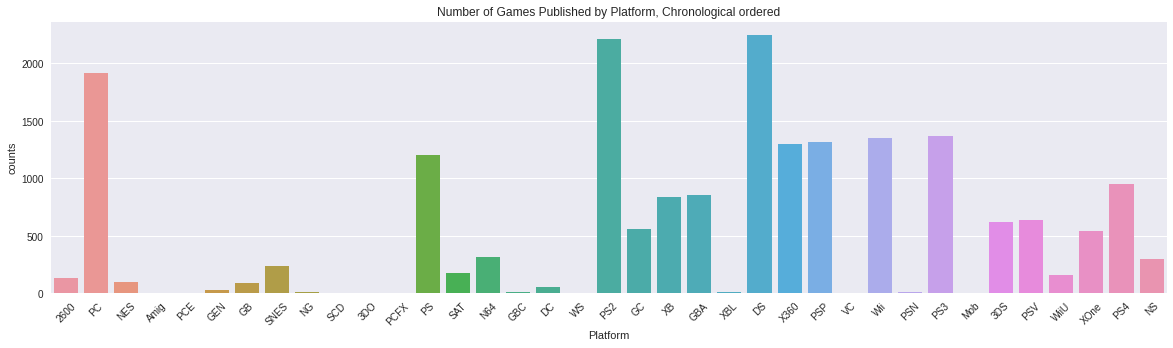

In [23]:
#plot games by platform again
#sort by chronological order this time

platform.Platform = pd.Categorical(platform.Platform, 
                      categories=platform_hist.Platform,
                      ordered=True)

fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Platform',y='counts', data=platform, ax= ax,
            order=platform.sort_values('Platform').Platform)

#plot formating
sns.despine(bottom = False, left = False)
plt.xticks(rotation=45)
plt.title("Number of Games Published by Platform, Chronological ordered")

plt.show()

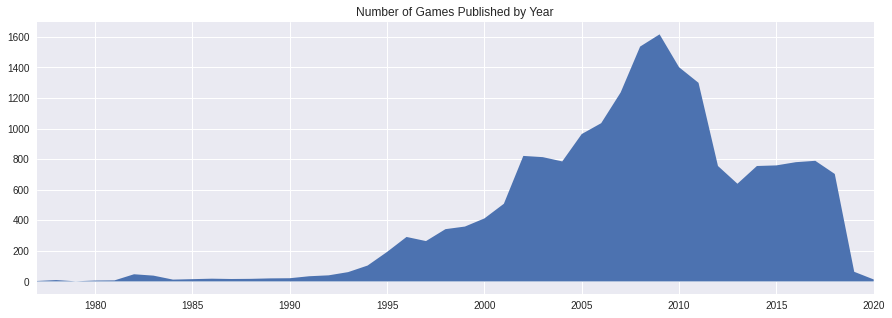

In [24]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(15,5))
plt.fill_between(year.Year, year.counts)

plt.title("Number of Games Published by Year")
ax.set_xlim(1977, 2020)

plt.show()

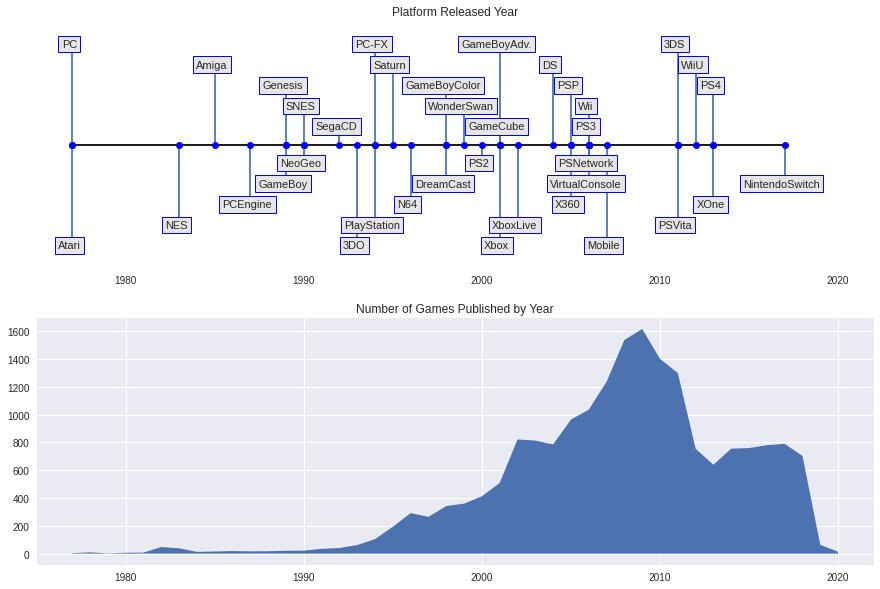

In [25]:
plt.style.use('seaborn')
#fig, ax = plt.subplots(2, figsize=(15,5))

# Choose some nice levels
levels = np.tile([-9, 9, -7, 7, -5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(platform_hist.Year)/10)))[:len(platform_hist.Year)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0].set(title="Platform Release Timeline")

markerline, stemline, baseline = ax[0].stem(platform_hist.Year, levels,
                                         linefmt="C6-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, markeredgecolor="k", markerfacecolor="b", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(platform_hist.Year)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(platform_hist.Year, levels, platform_hist.Label, vert):
    ax[0].annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points",va=va, ha="center", fontsize=11,
                bbox=dict(boxstyle='square', fc='0.9', ec = 'b',lw=1))
    
ax[0].set_xlim(1975, 2022)
ax[0].set_ylim(-12, 12)

# remove axis and spines
ax[0].get_yaxis().set_visible(False)
#ax[0].get_xaxis().set_visible(False)
ax[0].set_facecolor('white')
ax[0].margins(y=0.1)

#second graph
ax[1].fill_between(year.Year, year.counts)
ax[1].set(title="Number of Games Published by Year")
ax[1].set_xlim(1975, 2022)


plt.show()